First five rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0   0.659924   0.075805  -0.677162  -1.158068   0.865620   0.963360       0
1   0.244121  -0.108760   0.401712  -0.782841   1.208527   1.137462       0
2  -1.207273   1.441273  -1.435862   1.658822  -0.431315  -0.749202       1
3  -1.191372   2.189803  -0.808298   1.173294   0.736444   0.282479       1
4  -1.604993  -0.208122  -0.493001   1.985223  -0.021852  -0.511036       1

Summary Statistics:
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.038332    0.093692   -0.030409   -0.027714   -0.048848   -0.031206   
std      1.274375    1.060650    0.848964    1.323957    1.230126    0.894988   
min     -2.683180   -3.241267   -1.952088   -2.585909   -2.523434   -1.692005   
25%     -0.989945   -0.716089   -0.605838   -1.185113   -1.097573   -0.819243   
50%  

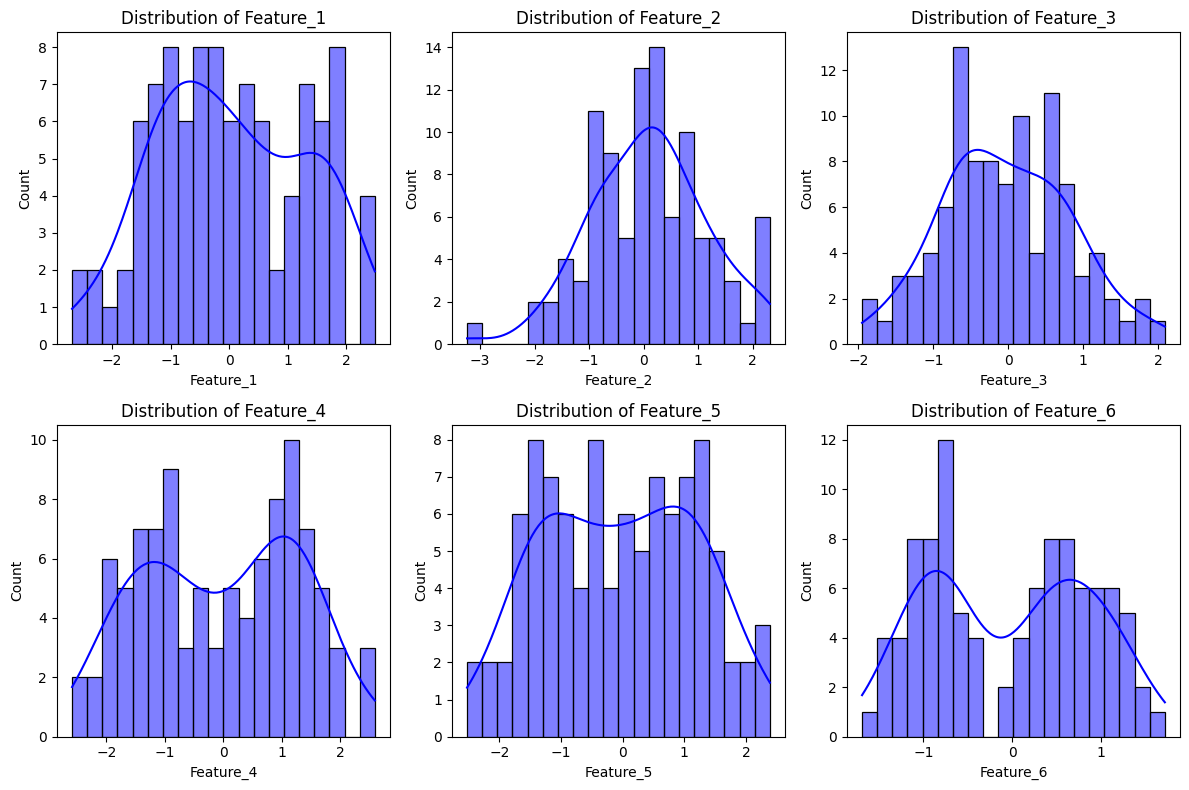


Feature Importance from Decision Tree:
     Feature  Importance
3  Feature_4    0.815986
5  Feature_6    0.134874
1  Feature_2    0.049140
0  Feature_1    0.000000
2  Feature_3    0.000000
4  Feature_5    0.000000

Feature Importance from Random Forest:
     Feature  Importance
3  Feature_4    0.482605
0  Feature_1    0.308267
5  Feature_6    0.091653
4  Feature_5    0.068589
1  Feature_2    0.033811
2  Feature_3    0.015076

Model Performance after Feature Selection:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "Day 45 Feature_Engineering_Data.csv"
df = pd.read_csv(file_path)

# Display the first five rows
print("First five rows of the dataset:")
print(df.head())

# Compute summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot feature distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Split data into features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_importance = dt.feature_importances_
feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importance})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

print("\nFeature Importance from Decision Tree:")
print(feature_importance_dt)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_importance = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print("\nFeature Importance from Random Forest:")
print(feature_importance_rf)

# Select top 3 most important features
top_features = feature_importance_rf['Feature'][:3].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train Decision Tree with selected features
dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_train_selected, y_train)

y_pred = dt_selected.predict(X_test_selected)
print("\nModel Performance after Feature Selection:")
print(classification_report(y_test, y_pred))